In [334]:
import pandas as pd
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import scienceplots
from imblearn.combine import SMOTETomek
import seaborn as sns

In [335]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.2, 0.8],
    class_sep=0.5,
)

In [349]:
from collections import Counter


def plot_resampling(X, y, sampler, ax):
    """Plot the resampled dataset using the sampler."""
    X_res, y_res = sampler.fit_resample(X, y)
    colors = {0: "#1f77b4", 1: "#ff7f0e"}
    ax.scatter(X_res[:, 0], X_res[:, 1], c=pd.Series(y_res).map(colors), alpha=1)
    #sns.despine(ax=ax, offset=10)
    #ax.set_title(f"Rozhodovací funkce pro {sampler.__class__.__name__}")
    return Counter(y_res)

In [350]:
import numpy as np


def plot_decision_function(X, y, clf, ax):
    """Plot the decision function of the classifier and the original data"""
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    colors = {0: "#1f77b4", 1: "#ff7f0e"}
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=1, c=pd.Series(y).map(colors))
    #ax.set_title(f"Augmentace pomocí {clf[0].__class__.__name__}")

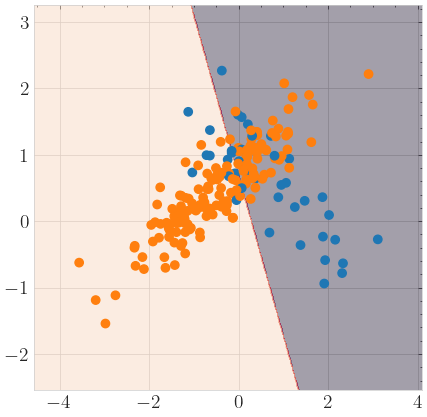

In [351]:
from imblearn.pipeline import make_pipeline

plt.style.use("science")
plt.rcParams["font.family"] = ["Latin Modern Roman"]
plt.rcParams["font.size"] = 14
samplers = [SMOTETomek(random_state=0)]
fpath = "C:/Users/Marek/OneDrive/School/DP/masters-thesis/assets/figures"

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
clf = make_pipeline(samplers[0], LinearSVC()).fit(X, y)
plot_decision_function(X, y, clf, axs)
# plot_resampling(X, y, samplers[0], axs[1])
plt.savefig(f"{fpath}/smote1.pdf", format="pdf", bbox_inches="tight")

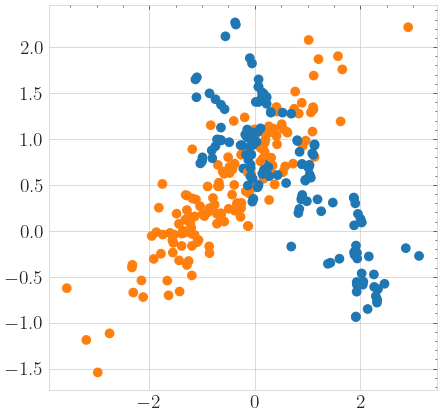

In [352]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
clf = make_pipeline(samplers[0], LinearSVC()).fit(X, y)
plot_resampling(X, y, samplers[0], axs)
plt.savefig(f"{fpath}/smote2.pdf", format="pdf", bbox_inches="tight")